# Ex 1.1

```
A 6
B 1
C 9
D 2
E 13
F 4
G 12
H 11
I 8
J 5
L 7
M 10
K 3
```

# Ex 1.2

## Plane
```
Controller    e) CPU
Actuators     c) Flaps...
Process       a) Plane
Disturbance   f) Crosswind
Sensors       d) Pilot tubes...
Reference input b) Yoke
```

## Chemical plant
```
Controller    b) PID
Controller    e) DCS
Process/plant d) Water tank
Disturbance   a) Leakage
State variable f) Temperature
Actuators      c) Valves
```

## Human body

```
Actuators     d) Muscles
Process/plant e) Human body
Controller    a) Gland
Sensors       b) Eyes
Controller and CPU f) Brain
State variable measurement  c) Blood sugar
```

# Simulating first-order systems
Using Python with `scipy.signal`

In [7]:
%matplotlib inline
import numpy
import scipy
import scipy.signal
import matplotlib.pyplot as plt
import pandas

In [8]:
def firstorder_simulate(A, B, initial=0.0, times=None):
    C = 1.0; D = 0.0 # unused, required by scipy.StateSpace
    system = scipy.signal.StateSpace(A, B, C, D)
    tt,YY = scipy.signal.step(system, initial, T=times)
    return tt, YY

## Ex 2: Autonomous Underwater Vehicle

### (a)
Derive the equations of motion from the forces that act on the AUV horizon-tally (by using Newton's second law). Use the velocity `v` as a state variable.

$$
\begin{align}
ma & = \sum{F} \\
ma & = u + r \\
ma & = u -kv \\
a & = \frac{u}{m} - \frac{k}{m}v \\
\dot{t} & = \frac{u}{m} - \frac{k}{m}v \\
\end{align}
$$

> What is the input in this model?

The input is the force `u`.

> What is the model order?

This is a first-order model.



### (b)
Derive the explicit solution to the differential equation that you found in (a).
For now you can assume that `u` is a constant.

$\dot{t} = \frac{u}{m} - \frac{k}{m}v$ is on form $\dot{x} = ax + bu$ with $a=\frac{-k}{m}$ and $b=\frac{1}{m}$ and $x=v$

so we have solution $x(t) = x_0e^{at} + \frac{b}{a}(e^{at}-1) $





### (c) 
> Find an expression for the time constant in the system.

$$
\begin{align}
\dot{x} & = ax + bu \\
T = -\frac{1}{a} \\
T = \frac{m}{k} \\
\end{align}
$$

> What does the time constant in a dynamical system describe?

How long it takes for the state to reach 63% of its stationary value

> What happens with the time constant if we increase `k` ?

The time constant decreases proportionally when increasing `k`

> What happens with the time constant if we increase the mass of the AUV?

The time constant increases proportionally when increasing mass `m`




### (d)
> You can now assume that `u` is the input.
> This means that the general differential equation is in the form. `ẋ = ax + bu`.
> The solution is, however, the same as you found in (b)
> Find an expression for the gain of the system.

Generally we have
$$
\begin{align}
\dot{x} & = ax + bu \\
0 & = ax + bu \\
-ax & = bu && \text{Gain means there exists a K such that x=Ku} \\
-aKu & = bu && \text{Divide by -au}\\
K & = \frac{b}{-a} \\
\end{align}
$$

Solving for our AUV system
$$
\begin{align}
K & = \frac{b}{-a} \\
K & = \frac{\frac{1}{m}}{-\frac{-k}{m}} \\
K & = \frac{1}{k} \\
\end{align}
$$

> What happens with the gain as we increase `k`?

When increasing `k` the gain `K` will decrease proportionally


### (e)
> From now on, assume that `m = 200kg` and `k = 100kg/s`.
> Calculate the time constant and the gain.

$T = m/k = 200 / 100 = 2 seconds$

$K = 1/k = 1 / 100 = 0.01 $

> Explain what this means.

This means the stationary speed `vs` will be `0.01 * u` and take 2 seconds to reach 63% of `vs`

### 2.f
We will assume that `u = 500N` is constant.
Consider an initial velocity `0m/s`.

Sketch the velocity `v` from `t = 0s` to `t = 15s`
either by hand or using computer aid (calculator/Matlab)

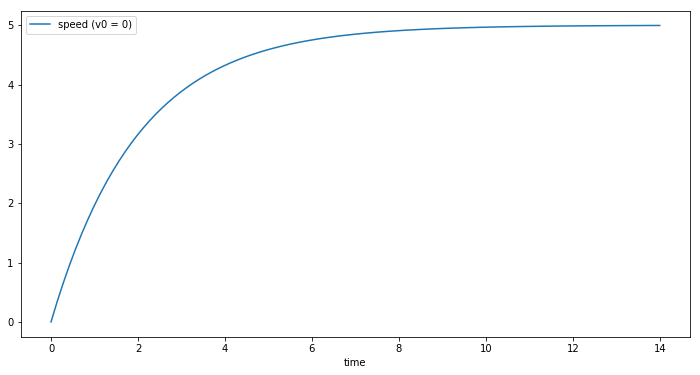

In [40]:
def uav_horizontal(m, k, u):
    A = -k/m
    B = (1/m)*u
    return A, B

system = uav_horizontal(m=200.0, k=100.0, u=500)
t, V = firstorder_simulate(*system, initial=0.0)

df = pandas.DataFrame({'time': t, 'speed (v0 = 0)': V})
df.plot(x='time', figsize=(12,6))

The plot confirms a T of 2 seconds, and reaching speed of 500*1/100 = 5 m/s

### (g)
Sketch the same response when `v_0 = 10m/s` and `v_0 = −5m/s`.


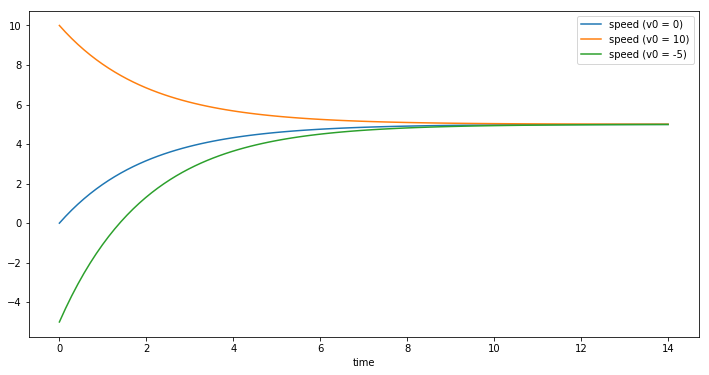

In [32]:
df['speed (v0 = 10)'] = firstorder_simulate(*system, initial=10.0, times=t)[1]
df['speed (v0 = -5)'] = firstorder_simulate(*system, initial=-5.0, times=t)[1]
df.plot(x='time', figsize=(12,6))

> How are the stationary values in a first order system affected by the initial values?

No matter what the initial values are the system reaches the same stable velocity, `5 m/s`

### (h)
> Consider an AUV holding a constant velocity of `3m/s`. Find the required input `u` by:
> (i) using the system gain;
> (ii) assuming that the derivative part in item (a) is zero.

The input is $u=vs/K = 3/(1/100) = 300 N$

### (i)
> Fig. 4 shows the response of two different AUVs with the same input.
> Point out a few relevant differences between the two AUVs.
> Consider in particular the differences in gain and time constant,
> and explain with your own words what these differences mean.

AUV1 has a time constant `T` of approx 4 seconds, and stationary `vs` value of 1.5 m/s.
AUV2 has T=0.75s and `vs=0.75 m/s`. AUV2 must have a lower mass than AUV1 to get a lower time constant (with same input). AUV2 must also have a higher drag coefficient `k` since it is not able to reach as high speed.

### 2.(j)
Assume once again that m = 200kg, k = 100kg/s , and v_0 = 0m/s 

Sketch the velocity of the AUV from t = 0s to t = 15s with u = 200N.

Then, at t = 15s, set u = 0N and sketch the velocity from t = 15s to t = 30s.
(remember to use the correct initial value at t = 15s).

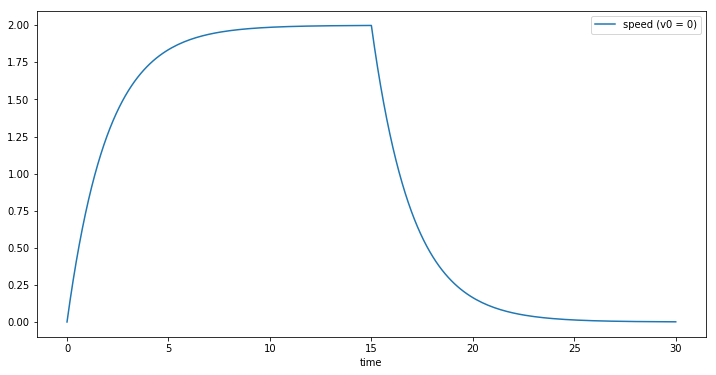

In [38]:
system1 = uav_horizontal(m=200.0, k=100.0, u=200)
t_0_15 = numpy.linspace(0, 15, 100)

# simulate each section of time/parameters separately
t1, V1 = firstorder_simulate(*system1, 0.0, t_0_15)
system2 = uav_horizontal(m=200.0, k=100.0, u=0.0)
t2, V2 = firstorder_simulate(*system2, V1[-1], t_0_15)
# combine into one stream
V = numpy.concatenate([V1, V2])
t = numpy.concatenate([t1, t2+t1[-1]])

df = pandas.DataFrame({'time': t, 'speed (v0 = 0)': V})
df.plot(x='time', figsize=(12,6))

> Do you recall the figure from a common system found in electric circuits? Which one?

This is the charge and discharge curve of a RC circuit

> What physical property does the mass of the AUV correspond to in the electric circuit?

The mass corresponds to the capacitance `C`

> What does the input correspond to?

The input corresponds to the input voltage `V_in`

# Ex 3. Heating plate
The heating plate is modeled as $ \dot T = {-k/c}T + 1/c(P+k T_{room}) $

Can be written on standard form 
$\dot T = a x + b$ with $a = -k/c$, $b = 1/c(P+kT_{room}) $ and $x = T$

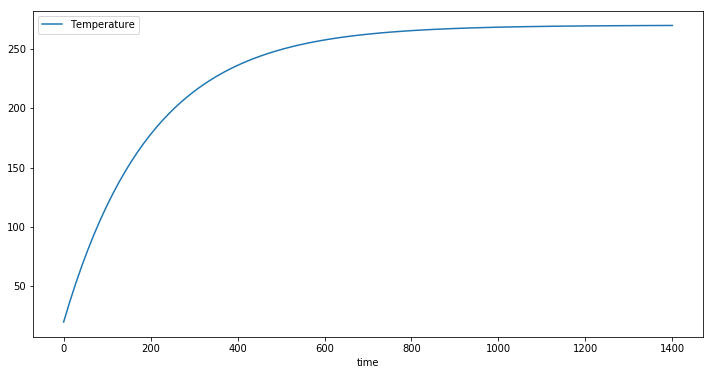

In [28]:
def cooking_plate(P, k, c, T_room):
    A = -k/c
    B = 1/c*(P+k*T_room)
    return A, B

system = cooking_plate(P=500,  k=2.0, c=400, T_room=20)
t, T = firstorder_simulate(*system, initial=20.0)

df = pandas.DataFrame({'time': t, 'Temperature': T})
df.plot(x='time', figsize=(12,6))

How model would be made in Simulink 

![Heating plate model Simulink style](./assigment1-fakesimulink-2.png)